Here we assume that you have downloaded a file, selected the Fe XII 195 2c fitting template, and computed the fits. If not, see `QUICK_GUIDE-cli.md` for help.

For this example we are working with the file `eis_20120924_105026`

In [1]:
import eispac
import matplotlib.pyplot as plt

In [2]:
# read in the results of the fitting
fit_filename = 'data_eis/eis_20120924_105026.fe_12_195_119.2c-0.fit.h5'
fit = eispac.read_fit(fit_filename)

Reading fit result from  data_eis/eis_20120924_105026.fe_12_195_119.2c-0.fit.h5


In [3]:
# this file contains a two-Gaussian fit to each line profile
print(fit.fit['line_ids'])

['Fe XII 195.119' 'Fe XII 195.179']


In [7]:
# get all of the intensities
intensity = fit.fit['int']
print(intensity.shape)

(512, 180, 2)


In [8]:
# get the index for the main component (what's in the filename)
component = fit.fit['main_component'] # the line of interest, could be multiple
print(component)

0


In [9]:
# get the intensity for just the Fe XII 195.119 line
intensity = fit.fit['int'][:,:,component]
line_id = fit.fit['line_ids'][component] # the line id for this line
print(intensity.shape)

(512, 180)


In [10]:
# compute an intensity range over which to scale the image
irange = eispac.util.calc_intensity_range(intensity)
scaled = eispac.util.scale_intensity(intensity, irange)

# one more thing, the EIS slit is often stepped more than 1 arcsec per step to increase the cadence
# we need to get the aspect ratio for imshow
aspect = fit.get_aspect_ratio()
print(f' aspect = {aspect:.2f}')

 aspect = 0.50


In [58]:
# in the next part we'll plot a spectrum, define that point now
point = [254,119]

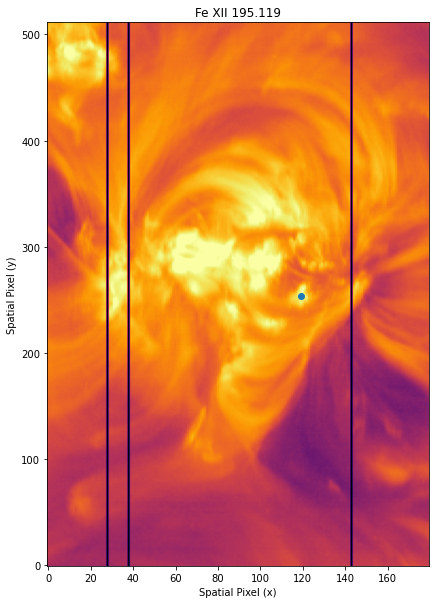

In [62]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(scaled, aspect=aspect, origin='lower', cmap='inferno', clim=(0,1))
ax.set_title(line_id)
ax.set_xlabel('Spatial Pixel (x)')
ax.set_ylabel('Spatial Pixel (y)')
ax.plot(point[1],point[0], 'o')
plt.show()

In [45]:
# to plot a spectral profile and the fit, we need to read in the data file
# the fit file only contains the fit parameters and some meta data

data_filename = 'data_eis/eis_20120924_105026.data.h5' # also in fit.meta['filename_data']
cube = eispac.read_cube(data_filename, 195.119)

Data file,
   /Users/hpw/Science/projects/EIS/eispac-current/eis/data_eis/eis_20120924_105026.data.h5
Header file,
   /Users/hpw/Science/projects/EIS/eispac-current/eis/data_eis/eis_20120924_105026.head.h5
Found a wavelength 195.12 [Angstroms] in window 8
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [69]:
# select a point to plot
point = [254,119]

data_x = cube.wavelength[point[0], point[1], :]
data_y = cube.data[point[0], point[1], :]
fit_x, fit_y = fit.get_fit_profile(coords=point, num_wavelengths=100)

In [70]:
# get some fit parameters
ints = intensity[point[0],point[1]]
p, perrpr = fit.get_params(component=component, coords=point)

print(f' intensity = {ints:.1f} counts')
print(f'      peak = {p[0]:.1f}')
print(f'  centroid = {p[1]:.3f}')
print(f'     sigma = {p[2]:.4f}')

 intensity = 2925.8 counts
      peak = 40574.2
  centroid = 195.118
     sigma = 0.0288


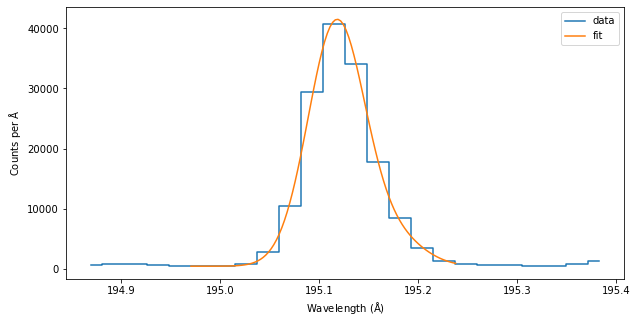

In [72]:
# plot the profile and the fit

fig = plt.figure(figsize=(10,5))
plt.step(data_x, data_y, where='mid', label='data')
plt.plot(fit_x, fit_y, label='fit')
plt.ylabel('Counts per $\mathrm{\AA}$')
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.legend()
plt.show()